In [132]:
# load packages
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # for ggplot-like style

## Import Data

In [133]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

# Let's both datasets at once
data_all = [train_data, test_data]

In [134]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploring some features

In [136]:
list(data_all[0])

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [137]:
data_all[0].describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Caram, Mrs. Joseph (Maria Elias)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


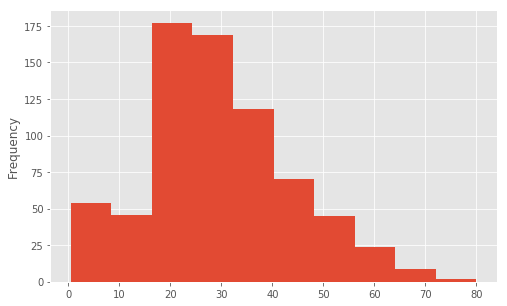

In [138]:
data_all[0]['Age'].plot(kind='hist',figsize=(8, 5))
plt.show()

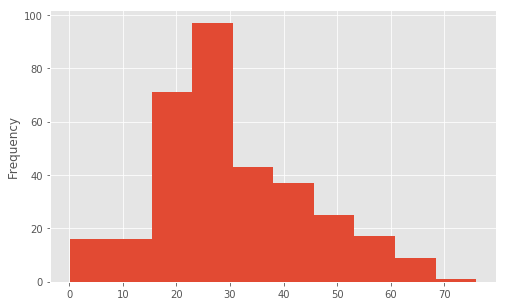

In [139]:
data_all[1]['Age'].plot(kind='hist',figsize=(8, 5))
plt.show()

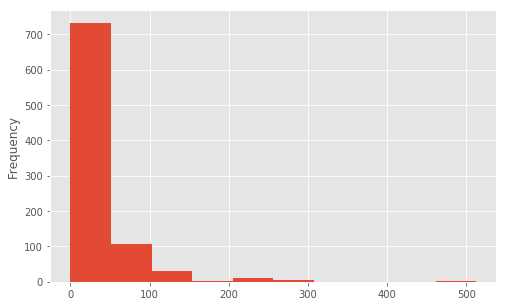

In [140]:
data_all[0]['Fare'].plot(kind='hist',figsize=(8, 5))
plt.show()

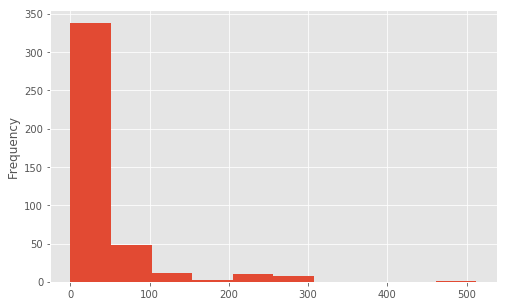

In [141]:
data_all[1]['Fare'].plot(kind='hist',figsize=(8, 5))
plt.show()

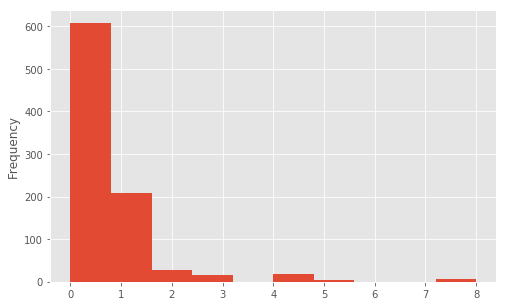

In [142]:
data_all[0]['SibSp'].plot(kind='hist',figsize=(8, 5))
plt.show()

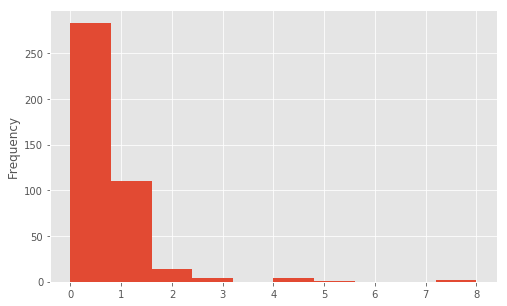

In [143]:
data_all[1]['SibSp'].plot(kind='hist',figsize=(8, 5))
plt.show()

## Deal with missing data

Seems like the Age column has 177 missing data, a 177/891 percent. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. 

A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. For this dataset, age will be imputed with the median (as they are not normal distribution it is better to use median than mean), the cabin attribute will be used, and embark will be imputed with mode. 

In [144]:
# Find out what columns in train data have null variable
print('Train data columns with null values:\n', data_all[0].isnull().sum())
print("-"*10)

Train data columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------


In [145]:
# Find out what columns in test data have null variable
print('Test data columns with null values:\n', data_all[1].isnull().sum())
print("-"*10)

Test data columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [146]:
## Replace missing age data with age median
for dataset in data_all:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

In [147]:
## Replace missing Embarked data with the most frequent Embarked data
for dataset in data_all:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

In [148]:
## Replace missing Fare data with the Fare median
for dataset in data_all:
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

## Convert String Variable to Categorical Variable


In [149]:
# Convert sex string variable to Binary Variable
for dataset in data_all:
    dataset['Sex'] = dataset['Sex'].apply(lambda g : +1 if g=='female' else 0) # convert female to +1 and male to 0

In [150]:
# Convert Embarked string variable to Categorical Variable
for dataset in data_all:
    dataset['Embarked'] = dataset['Embarked'].apply(lambda g : 0 if g=='S' else (1 if g=='C' else 2)) 

In [151]:
data_all[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [152]:
data_all[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [153]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


## Explore the association between age and survived

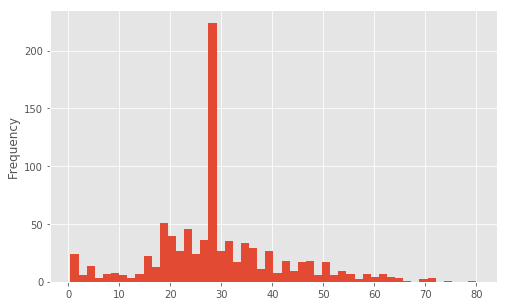

In [154]:
data_all[0]['Age'].plot(kind='hist',figsize=(8, 5),bins=50)

We can tell there are five significant age groups from the histogram above: 0-10, 11-20, 21-35, 36-50, 51 and above

In [155]:
association_age_survived=data_all[0][['Age','Survived']]
association_age_survived.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


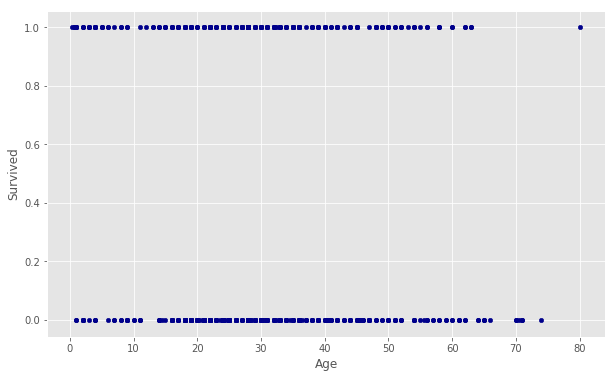

In [156]:
association_age_survived.plot(kind='scatter', x='Age', y='Survived', figsize=(10, 6), color='darkblue')

Didn't see a significant associaiton between age and survived

In [157]:
# Replace age with ordinals based on the five agroups
for dataset in data_all:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <=35), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 50), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 50, 'Age']=4

In [158]:
data_all[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0


## Exploring the target column

In [159]:
train_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

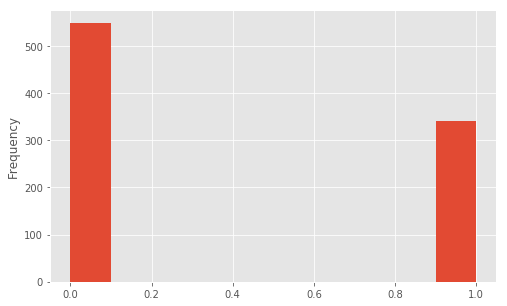

In [160]:
train_data['Survived'].plot(kind='hist',figsize=(8, 5),bins=10) # bins=10 means 10 bins; rwidth adjusts the width of bars to leave spaces between bars
plt.show()

In [161]:
train_data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

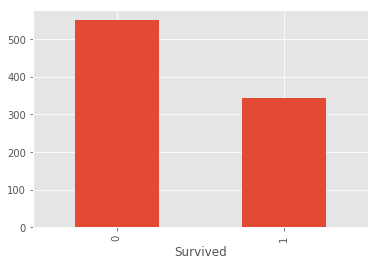

In [162]:
# Plot for a categorical column
train_data.groupby('Survived').size().plot(kind='bar')
plt.show()

It looks like most passengers didn't survive

## Features for the classification algorithm

In [163]:
# The initial features include variables as below
features_1 = ['Pclass',
             'Sex',
             'Age',
             'SibSp',
             'Parch',
             'Fare',
             'Embarked'
           ]
target = 'Survived'

In [164]:
# Extract the feature columns and target column
train_data = train_data[features_1 + [target]]

In [165]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,2.0,1,0,7.2500,0,0
1,1,1,3.0,1,0,71.2833,1,1
2,3,1,2.0,0,0,7.9250,0,1
3,1,1,2.0,1,0,53.1000,0,1
4,3,0,2.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,13.0000,0,0
887,1,1,1.0,0,0,30.0000,0,1
888,3,1,2.0,1,2,23.4500,0,0
889,1,0,2.0,0,0,30.0000,1,1


# Use logistic regression to build a classifier


In [166]:
train_data[features_1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2.0,1,0,7.2500,0
1,1,1,3.0,1,0,71.2833,1
2,3,1,2.0,0,0,7.9250,0
3,1,1,2.0,1,0,53.1000,0
4,3,0,2.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,13.0000,0
887,1,1,1.0,0,0,30.0000,0
888,3,1,2.0,1,2,23.4500,0
889,1,0,2.0,0,0,30.0000,1


In [167]:
# Give feature data and target data to X and y and conver to array
X = train_data[features_1].values
y = train_data[target].values

In [168]:
X

array([[  3.    ,   0.    ,   2.    , ...,   0.    ,   7.25  ,   0.    ],
       [  1.    ,   1.    ,   3.    , ...,   0.    ,  71.2833,   1.    ],
       [  3.    ,   1.    ,   2.    , ...,   0.    ,   7.925 ,   0.    ],
       ..., 
       [  3.    ,   1.    ,   2.    , ...,   2.    ,  23.45  ,   0.    ],
       [  1.    ,   0.    ,   2.    , ...,   0.    ,  30.    ,   1.    ],
       [  3.    ,   0.    ,   2.    , ...,   0.    ,   7.75  ,   2.    ]])

In [169]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [170]:
# Import stratified K Fold
from sklearn.model_selection import StratifiedKFold #This cross-validation object is a variation of KFold that returns stratified folds. 
                                                    #The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False) # Split the training data to 10 folds

# use stratified K Fold to split training data to train and test so that we can calcualte the accurary scores

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334

In [171]:
# Fit a logistic regression model
#Step 1. Import the model I want to use
from sklearn.linear_model import LogisticRegression

#Step 2. Make an instance of the Model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

#Step 3. Training the model on the data, storing the information learned from the data
features_1_model = logisticRegr.fit(X_train, y_train)

In [172]:
# Look at the weight for each feature
features_1_model.coef_.reshape(-1,1).tolist()

[[-0.9621216329335498],
 [2.644435005798735],
 [-0.48057266496111295],
 [-0.29802975702465234],
 [-0.10618702422585939],
 [0.0030871952393517134],
 [0.19250798623218277]]

In [173]:
# Convert a list of list to a list
flat_list = [item for sublist in features_1_model.coef_.reshape(-1,1).tolist() for item in sublist]

In [174]:
# Print out the weight for each feature
feature_1_weight = pd.DataFrame(
    {'feature': features_1,
     'weight': flat_list
    })
feature_1_weight

,feature,weight
0,Pclass,-0.962122
1,Sex,2.644435
2,Age,-0.480573
3,SibSp,-0.298030
4,Parch,-0.106187
5,Fare,0.003087
6,Embarked,0.192508


Seems like Sex, Pclass and Age are the top three weighted features. The largert the number of Pclass, Age, SibSp and Parch, the lower rate of survival

### Accuracy scores

In [175]:
scores = []
scores.append(features_1_model.score(X_test, y_test))
print(np.mean(scores))

0.818181818182


## Making predictions

In [176]:
test_data[features_1].isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [177]:
y_pred_features_1=features_1_model.predict(test_data[features_1])
y_pred_features_1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [178]:
y_pred_features_1.reshape(-1,1).tolist()

[[0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0]

In [179]:
# Convert a list of list to a list
y_pred_flat = [item for sublist in y_pred_features_1.reshape(-1,1).tolist() for item in sublist]

# Print out the weight for each feature
feature_1_pred = pd.DataFrame(
    {'PassengerId': test_data['PassengerId'],
     'Survived': y_pred_flat
    })
feature_1_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Feature Engineering
### Include more features to improve accuray scores

In [180]:
data_all[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,2.0,0,0,111369,30.0000,C148,1


In [181]:
# Name,Cabin and Ticket are not included in Features_1
data_all[0][features_1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2.0,1,0,7.2500,0
1,1,1,3.0,1,0,71.2833,1
2,3,1,2.0,0,0,7.9250,0
3,1,1,2.0,1,0,53.1000,0
4,3,0,2.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,13.0000,0
887,1,1,1.0,0,0,30.0000,0
888,3,1,2.0,1,2,23.4500,0
889,1,0,2.0,0,0,30.0000,1


In [182]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = data_all[0].corr()


In [183]:
data_all[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,2.0,0,0,111369,30.0000,C148,1


In [184]:
# plot the heatmap
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '9pt'})\
    .set_caption("Feature Correlation for Titanic Survival")\
    .set_precision(2)\


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1,-0.005,-0.035,-0.043,0.02,-0.058,-0.0017,0.013,-0.03
Survived,-0.005,1,-0.34,0.54,-0.073,-0.035,0.082,0.26,0.11
Pclass,-0.035,-0.34,1,-0.13,-0.32,0.083,0.018,-0.55,0.046
Sex,-0.043,0.54,-0.13,1,-0.079,0.11,0.25,0.18,0.12
Age,0.02,-0.073,-0.32,-0.079,1,-0.25,-0.18,0.092,-0.0071
SibSp,-0.058,-0.035,0.083,0.11,-0.25,1,0.41,0.16,-0.06
Parch,-0.0017,0.082,0.018,0.25,-0.18,0.41,1,0.22,-0.079
Fare,0.013,0.26,-0.55,0.18,0.092,0.16,0.22,1,0.062
Embarked,-0.03,0.11,0.046,0.12,-0.0071,-0.06,-0.079,0.062,1


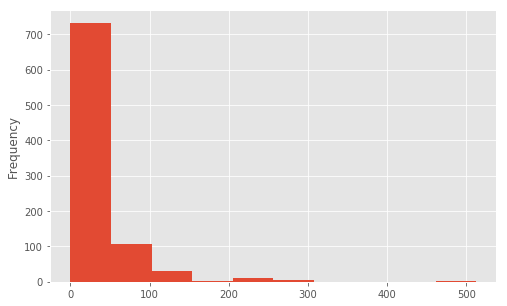

In [185]:
data_all[0]['Fare'].plot(kind='hist',figsize=(8, 5))
plt.show()

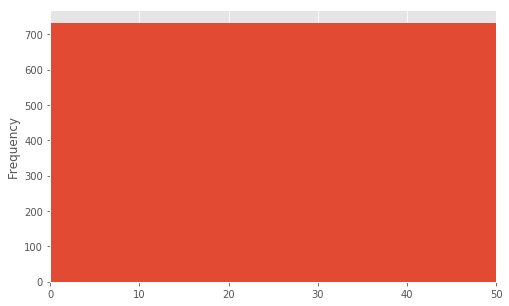

In [186]:
data_all[0]['Fare'].plot(kind='hist',figsize=(8, 5))
plt.xlim(xmin=0, xmax = 50) # xmax limts the x range
plt.show()

In [187]:
# Creating new feature extracting from existing
# We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.\
#In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

train_data=data_all[0]
test_data=data_all[1]
for dataset in data_all:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [188]:
# Create fare band
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4) # qcut means Quantile-based discretization function. Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [189]:
for dataset in data_all:
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']= 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Feature that tells whether a passenger had a cabin on the Titanic
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda g: 0 if type(g) == float else 1)
    

In [190]:
'''# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
'''

'# Feature that tells whether a passenger had a cabin on the Titanic\ntrain[\'Has_Cabin\'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)\ntest[\'Has_Cabin\'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)\n'